In [1]:

import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import LabelEncoder
CSV_PATH="merged_clean.csv"
df=pd.read_csv(CSV_PATH)
random_seed=47


In [2]:
df

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1221,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1222,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1223,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1224,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

author_corpus = df.groupby("author")["song_text"].apply(lambda x: " ".join(x)).reset_index()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(author_corpus["song_text"])
feature_names = vectorizer.get_feature_names_out()

print("Author Representations in TF-IDF Space (Top 10 Terms):")
for idx, author in enumerate(author_corpus["author"]):
    tfidf_vector = X[idx].toarray()[0]
    top_indices = tfidf_vector.argsort()[-10:][::-1]
    top_terms = [feature_names[i] for i in top_indices]
    top_scores = [tfidf_vector[i] for i in top_indices]
    print(f"\n{author}:")
    for term, score in zip(top_terms, top_scores):
        print(f"  {term}: {score:.3f}")

similarity_matrix = cosine_similarity(X, X)

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=author_corpus["author"],
    columns=author_corpus["author"]
)


"""plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Author Similarity Heatmap (TF-IDF + Cosine Similarity)")
plt.show()

print("\nTop 5 Similar Authors Based on Cosine Similarity:")
for author in similarity_df.index:
    sims = similarity_df.loc[author].drop(author)  
    top5 = sims.sort_values(ascending=False).head(5)
    print(f"\nTop 5 similar authors for {author}:")
    for other, score in top5.items():
        print(f"  {other}: {score:.3f}")"""

Author Representations in TF-IDF Space (Top 10 Terms):

Јован Котески:
  април: 0.375
  ко: 0.350
  љубена: 0.269
  да: 0.248
  на: 0.165
  трло: 0.163
  здивне: 0.163
  допри: 0.163
  котески: 0.163
  млаз: 0.146

Јосип Коцев:
  коцев: 0.286
  јосип: 0.286
  во: 0.266
  на: 0.205
  април: 0.183
  со: 0.174
  колку: 0.173
  сме: 0.167
  какви: 0.162
  ќе: 0.161

Адам Гајтани:
  на: 0.490
  се: 0.330
  во: 0.285
  од: 0.240
  со: 0.212
  го: 0.208
  ја: 0.186
  да: 0.159
  како: 0.138
  не: 0.137

Анте Поповски:
  анте: 0.347
  поповски: 0.347
  да: 0.275
  на: 0.219
  од: 0.201
  се: 0.201
  во: 0.182
  го: 0.153
  не: 0.152
  ќе: 0.135

Ацо Караманов:
  караманов: 0.330
  ацо: 0.296
  ќе: 0.260
  во: 0.201
  на: 0.201
  верувај: 0.152
  со: 0.137
  нè: 0.137
  да: 0.134
  челично: 0.132

Ацо Шопов:
  шопов: 0.335
  на: 0.323
  ацо: 0.300
  во: 0.247
  од: 0.210
  купувам: 0.178
  се: 0.162
  што: 0.156
  стари: 0.154
  подобри: 0.146

Блаже Конески:
  да: 0.358
  се: 0.321
  на: 0.304

'plt.figure(figsize=(10, 8))\nsns.heatmap(similarity_df, cmap="coolwarm", annot=False)\nplt.title("Author Similarity Heatmap (TF-IDF + Cosine Similarity)")\nplt.show()\n\nprint("\nTop 5 Similar Authors Based on Cosine Similarity:")\nfor author in similarity_df.index:\n    sims = similarity_df.loc[author].drop(author)  \n    top5 = sims.sort_values(ascending=False).head(5)\n    print(f"\nTop 5 similar authors for {author}:")\n    for other, score in top5.items():\n        print(f"  {other}: {score:.3f}")'

Stop words are too common. Need to filter them out

Loaded 0 Macedonian stopwords

Author Representations in TF-IDF Space (Top 10 Terms):

Јован Котески:
  април: 0.424
  ко: 0.395
  љубена: 0.304
  јован: 0.165
  млаз: 0.165
  питом: 0.152
  заспи: 0.152
  гулаб: 0.141
  стада: 0.141
  крвав: 0.133

Јосип Коцев:
  април: 0.286
  колку: 0.271
  сме: 0.260
  какви: 0.254
  ко: 0.224
  бил: 0.170
  оди: 0.156
  овој: 0.150
  атом: 0.134
  свет: 0.132

Адам Гајтани:
  еден: 0.171
  една: 0.149
  те: 0.132
  му: 0.119
  јас: 0.113
  седум: 0.107
  смртта: 0.099
  мојата: 0.094
  божилото: 0.094
  земјата: 0.087

Анте Поповски:
  поповски: 0.471
  анте: 0.471
  една: 0.129
  само: 0.128
  зашто: 0.118
  нешта: 0.108
  таа: 0.105
  тие: 0.098
  еве: 0.095
  нас: 0.095

Ацо Караманов:
  ацо: 0.404
  верувај: 0.207
  нè: 0.187
  тргнеме: 0.148
  дојдеш: 0.138
  пушки: 0.138
  железо: 0.130
  можеби: 0.120
  нека: 0.112
  топи: 0.111

Ацо Шопов:
  ацо: 0.467
  стари: 0.239
  старо: 0.221
  ме: 0.141
  ко: 0.140
  те: 0.123
  сите: 0.122
  девет:

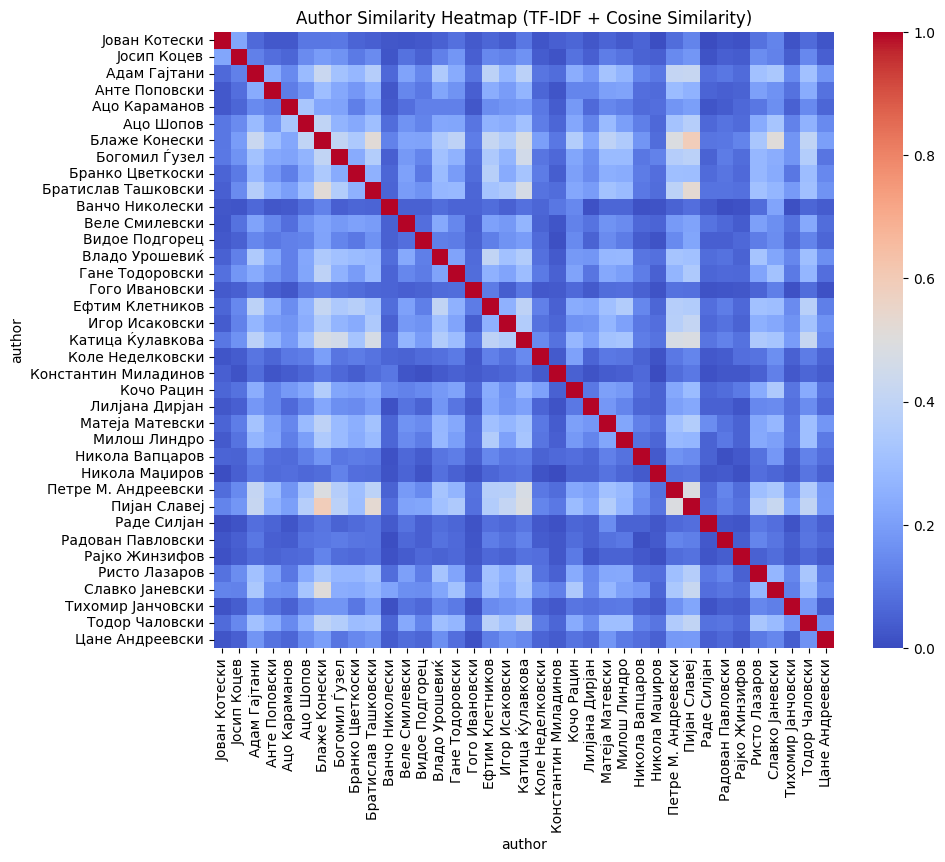


Top 5 Similar Authors Based on Cosine Similarity:

Top 5 similar authors for Јован Котески:
  Јосип Коцев: 0.222
  Пијан Славеј: 0.133
  Славко Јаневски: 0.130
  Богомил Ѓузел: 0.104
  Блаже Конески: 0.101

Top 5 similar authors for Јосип Коцев:
  Јован Котески: 0.222
  Блаже Конески: 0.192
  Гане Тодоровски: 0.178
  Пијан Славеј: 0.177
  Богомил Ѓузел: 0.171

Top 5 similar authors for Адам Гајтани:
  Блаже Конески: 0.427
  Пијан Славеј: 0.420
  Петре М. Андреевски: 0.410
  Ефтим Клетников: 0.390
  Катица Ќулавкова: 0.384

Top 5 similar authors for Анте Поповски:
  Блаже Конески: 0.300
  Петре М. Андреевски: 0.290
  Катица Ќулавкова: 0.268
  Пијан Славеј: 0.259
  Братислав Ташковски: 0.252

Top 5 similar authors for Ацо Караманов:
  Ацо Шопов: 0.331
  Блаже Конески: 0.225
  Богомил Ѓузел: 0.212
  Пијан Славеј: 0.202
  Братислав Ташковски: 0.200

Top 5 similar authors for Ацо Шопов:
  Блаже Конески: 0.400
  Пијан Славеј: 0.368
  Ацо Караманов: 0.331
  Славко Јаневски: 0.326
  Петре М. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re


try:
    with open('macedonian_stopwords.txt', 'r', encoding='utf-8') as f:
        macedonian_stop_words = [line.strip() for line in f if line.strip()]
    print(f"Loaded {len(macedonian_stop_words)} Macedonian stopwords")
except FileNotFoundError:
    print("Error: macedonian_stopwords.txt not found. Please download from https://raw.githubusercontent.com/stopwords-iso/stopwords-mk/master/stopwords-mk.txt")
    exit(1)

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    return text

df_filtered=df
df_filtered['song_text'] = df_filtered['song_text'].apply(preprocess_text)


author_corpus = df_filtered.groupby("author")["song_text"].apply(lambda x: " ".join(x)).reset_index()

vectorizer = TfidfVectorizer(
    stop_words=macedonian_stop_words,
    max_df=0.8,  
    min_df=2     
)
X = vectorizer.fit_transform(author_corpus["song_text"])


feature_names = vectorizer.get_feature_names_out()


print("\nAuthor Representations in TF-IDF Space (Top 10 Terms):")
for idx, author in enumerate(author_corpus["author"]):
    tfidf_vector = X[idx].toarray()[0]
    top_indices = tfidf_vector.argsort()[-10:][::-1]
    top_terms = [feature_names[i] for i in top_indices]
    top_scores = [tfidf_vector[i] for i in top_indices]
    print(f"\n{author}:")
    for term, score in zip(top_terms, top_scores):
        print(f"  {term}: {score:.3f}")


similarity_matrix = cosine_similarity(X, X)


similarity_df = pd.DataFrame(
    similarity_matrix,
    index=author_corpus["author"],
    columns=author_corpus["author"]
)


plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Author Similarity Heatmap (TF-IDF + Cosine Similarity)")
plt.show()


print("\nTop 5 Similar Authors Based on Cosine Similarity:")
for author in similarity_df.index:
    sims = similarity_df.loc[author].drop(author)  
    top5 = sims.sort_values(ascending=False).head(5)
    print(f"\nTop 5 similar authors for {author}:")
    for other, score in top5.items():
        print(f"  {other}: {score:.3f}")

Problem with macedonian stop words.

/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-22 13:00:19.715614: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-22 13:00:19.863946: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ivan/Desktop/Diplomska/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: 

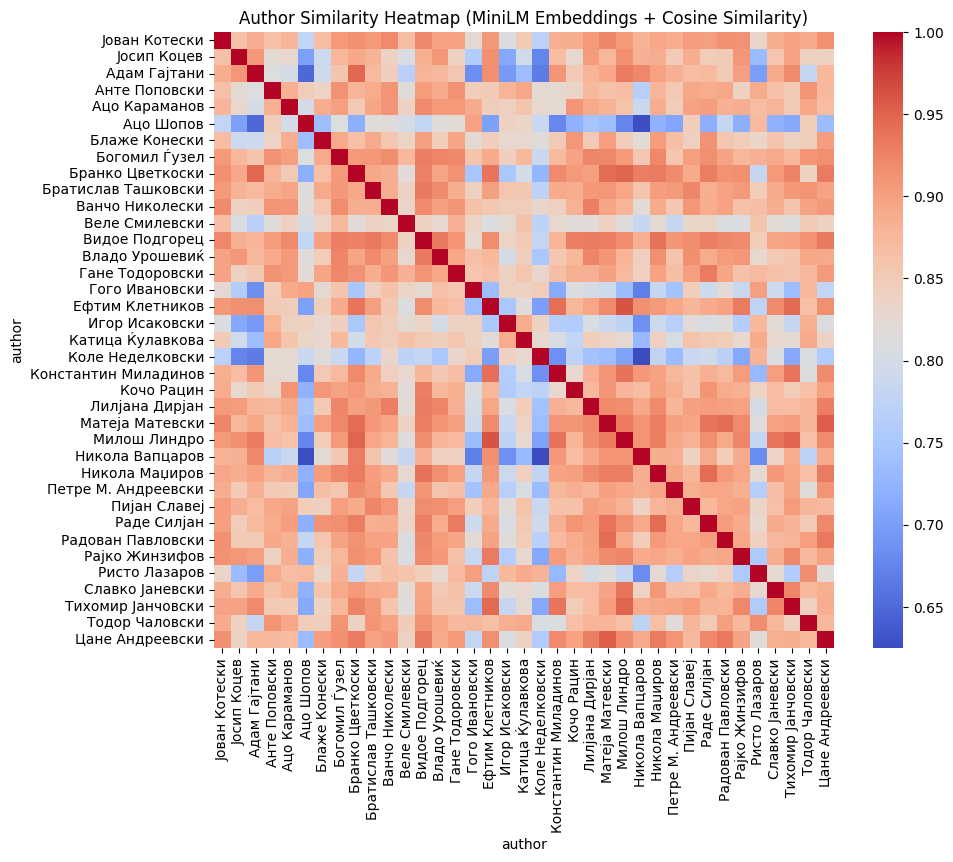


Top 5 similar authors for Јован Котески:
  Матеја Матевски: 0.923
  Видое Подгорец: 0.922
  Ванчо Николески: 0.921
  Цане Андреевски: 0.915
  Радован Павловски: 0.914

Top 5 similar authors for Јосип Коцев:
  Милош Линдро: 0.914
  Ефтим Клетников: 0.914
  Рајко Жинзифов: 0.909
  Адам Гајтани: 0.908
  Владо Урошевиќ: 0.908

Top 5 similar authors for Адам Гајтани:
  Бранко Цветкоски: 0.949
  Милош Линдро: 0.931
  Никола Вапцаров: 0.921
  Тихомир Јанчовски: 0.920
  Ефтим Клетников: 0.915

Top 5 similar authors for Анте Поповски:
  Гане Тодоровски: 0.913
  Богомил Ѓузел: 0.913
  Тодор Чаловски: 0.911
  Ванчо Николески: 0.911
  Видое Подгорец: 0.903

Top 5 similar authors for Ацо Караманов:
  Видое Подгорец: 0.920
  Кочо Рацин: 0.912
  Ванчо Николески: 0.910
  Владо Урошевиќ: 0.906
  Гане Тодоровски: 0.906

Top 5 similar authors for Ацо Шопов:
  Гого Ивановски: 0.897
  Ристо Лазаров: 0.872
  Анте Поповски: 0.849
  Тодор Чаловски: 0.848
  Пијан Славеј: 0.847

Top 5 similar authors for Блаже

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2",device='cpu')

author_corpus = df.groupby("author")["song_text"].apply(lambda x: " ".join(x)).reset_index()

embeddings = model.encode(author_corpus["song_text"], convert_to_tensor=False, normalize_embeddings=True)

similarity_matrix = cosine_similarity(embeddings)

similarity_df = pd.DataFrame(   
    similarity_matrix,
    index=author_corpus["author"],
    columns=author_corpus["author"]
)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Author Similarity Heatmap (MiniLM Embeddings + Cosine Similarity)")
plt.show()

for author in similarity_df.index:
    sims = similarity_df.loc[author].drop(author)  
    top5 = sims.sort_values(ascending=False).head(5)
    print(f"\nTop 5 similar authors for {author}:")
    for other, score in top5.items():
        print(f"  {other}: {score:.3f}")


Trying to reduce similarity if it is too big.

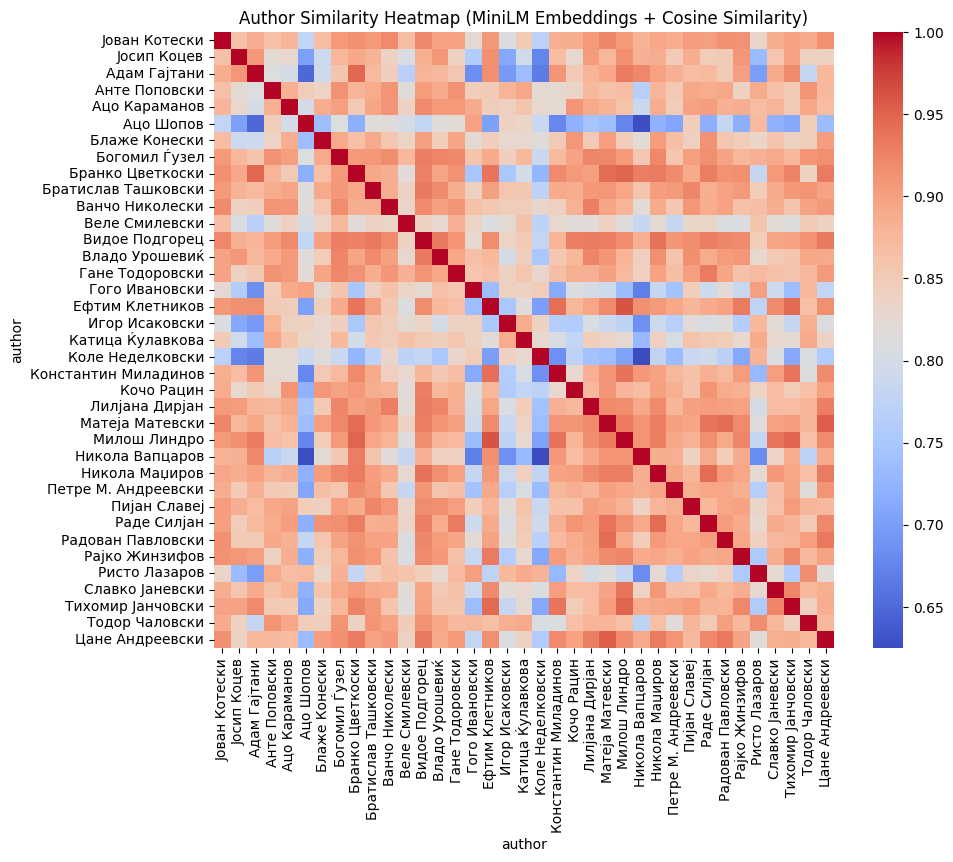


Top 5 similar authors for Јован Котески:
  Матеја Матевски: 0.923
  Видое Подгорец: 0.922
  Ванчо Николески: 0.921
  Цане Андреевски: 0.915
  Радован Павловски: 0.914

Top 5 similar authors for Јосип Коцев:
  Милош Линдро: 0.914
  Ефтим Клетников: 0.914
  Рајко Жинзифов: 0.909
  Адам Гајтани: 0.908
  Владо Урошевиќ: 0.908

Top 5 similar authors for Адам Гајтани:
  Бранко Цветкоски: 0.949
  Милош Линдро: 0.931
  Никола Вапцаров: 0.921
  Тихомир Јанчовски: 0.920
  Ефтим Клетников: 0.915

Top 5 similar authors for Анте Поповски:
  Гане Тодоровски: 0.913
  Богомил Ѓузел: 0.913
  Тодор Чаловски: 0.911
  Ванчо Николески: 0.911
  Видое Подгорец: 0.903

Top 5 similar authors for Ацо Караманов:
  Видое Подгорец: 0.920
  Кочо Рацин: 0.912
  Ванчо Николески: 0.910
  Владо Урошевиќ: 0.906
  Гане Тодоровски: 0.906

Top 5 similar authors for Ацо Шопов:
  Гого Ивановски: 0.897
  Ристо Лазаров: 0.872
  Анте Поповски: 0.849
  Тодор Чаловски: 0.848
  Пијан Славеј: 0.847

Top 5 similar authors for Блаже

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2",device='cpu')

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    return text
df_filtered=df
df_filtered['song_text'] = df_filtered['song_text'].apply(preprocess_text)

author_corpus = df_filtered.groupby("author")["song_text"].apply(lambda x: " ".join(x)).reset_index()

embeddings = model.encode(author_corpus["song_text"], convert_to_tensor=False, normalize_embeddings=True)

similarity_matrix = cosine_similarity(embeddings)

similarity_df = pd.DataFrame(   
    similarity_matrix,
    index=author_corpus["author"],
    columns=author_corpus["author"]
)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Author Similarity Heatmap (MiniLM Embeddings + Cosine Similarity)")
plt.show()

for author in similarity_df.index:
    sims = similarity_df.loc[author].drop(author)  
    top5 = sims.sort_values(ascending=False).head(5)
    print(f"\nTop 5 similar authors for {author}:")
    for other, score in top5.items():
        print(f"  {other}: {score:.3f}")
